In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Sets the plots to be displayed and saved in notebook
%matplotlib inline 
plt.rcParams["figure.figsize"] = (20,3)
col_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars = pd.read_csv('q1.csv',names=col_names)
print(cars.shape)
cars.head()

(205, 26)


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
#Converts some nominal data to numeric for analysis
cars['fuel_type'].replace(['gas','diesel'],[1,0],inplace=True)
cars['aspiration'].replace(['std','turbo'],[0,1],inplace=True)
cars.replace('?',np.nan,inplace=True)
cars.head(205)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,1,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,1,0,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,1,0,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,1,0,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,1,0,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,1,0,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,1,1,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,1,0,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,0,1,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [159]:
#Select features to be considered for KNN
use_feature=['normalized_losses','fuel_type','aspiration','wheel_base','length','width','height','curb_weight','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars=cars[use_feature].copy()
cars.head(205)

,normalized_losses,fuel_type,aspiration,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,1.0,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,1.0,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,1.0,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,1.0,0.0,0.655977,0.711940,0.716667,0.641667,0.567882,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,16845.0
201,0.157068,1.0,1.0,0.655977,0.711940,0.708333,0.641667,0.605508,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,19045.0
202,0.157068,1.0,0.0,0.655977,0.711940,0.716667,0.641667,0.591156,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.0,1.0,0.655977,0.711940,0.716667,0.641667,0.670675,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,22470.0


In [4]:
#Converts all columns to numeric type
cars.dtypes
num=['normalized_losses','bore','stroke','horsepower','peak_rpm','price']
cars[num]=cars[num].astype(float)
cars.dtypes

normalized_losses    float64
fuel_type              int64
aspiration             int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [5]:
#Replaces Nan values with mean of thier column
cars.fillna(cars.mean(),inplace=True)

In [6]:
#Normalize Atribute values to range 0 to 1
t=cars['price']
cars=(cars-cars.min())/(cars.max()-cars.min())
cars['price']=t
cars.head()

,normalized_losses,fuel_type,aspiration,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,1.0,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,1.0,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,1.0,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


In [134]:
## Function to calculate eucledian distance
def euc_dist(a,b):
    d = np.sqrt(np.sum(pow(a-b,2)))
    return d

##Function to calculate K Nearest Neighbours

def KNN (train_data,price,test_data,k):
    pred=[] #label predicted by model
    
    for tid,test in test_data.iterrows():
        
        distances=[] ## Stores distance of test point from training points
        ##Calculates eucledian distance between test and train points
        trainid=[]
        for trid,train in train_data.iterrows():
            d = euc_dist(np.array(train),np.array(test))
            distances.append(d)
            trainid.append(trid)
        
        distances=np.array(distances)
        trainid=np.array(trainid)
       
        ##Finds k nearest neighbors and thier values
        
        nearest=trainid[np.argsort(distances)[:k]]
       
        near_values= [price[n] for n in nearest]
        
        ## Takes average of nearest neighbors values and appends to result
        pred.append(np.average(near_values))
    
    return pred

## Calculates Root Mean Square Error

def rmse(actual,predicted):
    return np.sqrt(np.sum((actual-predicted)**2)/len(actual))


In [163]:
f=use_feature.copy()
f.remove('price')
test_k=[x for x in range(1,144,2)] ##Different K values to be tested 

## Split into train and val set in ratio 70:30

train_set = cars[0:int(len(cars)*0.7)]
val_set = cars[int(len(cars)*0.7):]


rmse_k={} ##Stores error of prediction for each value of K
for k in test_k:
    pred = KNN(train_set[f],train_set['price'],val_set[f],k)
    rmse_k[k]=(rmse(val_set['price'],pred))


rmse_k

{1: 3428.3948515397865,
 3: 2801.9297139406976,
 5: 3047.1538026531707,
 7: 2772.9829305151766,
 9: 2672.907947987689,
 11: 2786.7856535456262,
 13: 2623.8782985288844,
 15: 2502.6475954906655,
 17: 2298.5926789168734,
 19: 2180.689274178214,
 21: 2141.7631066843146,
 23: 1988.799127245447,
 25: 1937.5244070762985,
 27: 1982.8317603657817,
 29: 1998.6805053343292,
 31: 2009.423481665927,
 33: 1966.8433839020524,
 35: 1893.357324831832,
 37: 1864.3296648019468,
 39: 1906.9280229327728,
 41: 1903.6955257469983,
 43: 1894.3949723962562,
 45: 1897.1137031509993,
 47: 1932.1499931763174,
 49: 1944.8617892879713,
 51: 1991.541105114998,
 53: 2005.6503932830185,
 55: 2039.5525433412824,
 57: 2005.5134968667553,
 59: 2045.7475949316245,
 61: 2021.7947661703301,
 63: 2043.5662708596058,
 65: 2049.5468412472915,
 67: 2054.507726820561,
 69: 2078.2927783166137,
 71: 2092.4038551469434,
 73: 2151.3107900885084,
 75: 2205.0432610336807,
 77: 2280.176364085224,
 79: 2305.7816076167237,
 81: 2359.212

1864.3296648019468 37


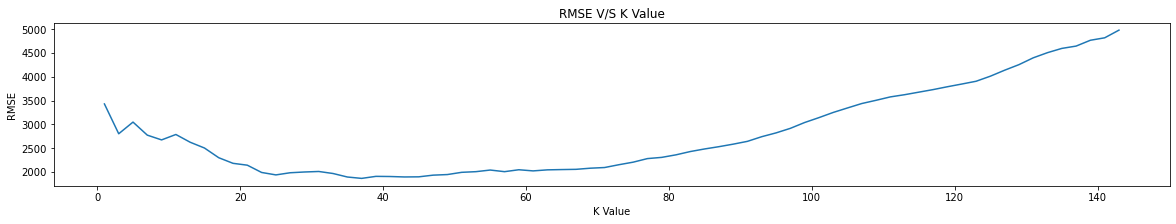

In [212]:
fig , ax = plt.subplots(1)

values=np.array([x for x in rmse_k.values()])
keys=[k for k in rmse_k.keys()]

ax.plot(test_k, values)
ax.set_xlabel('K Value')
ax.set_ylabel('RMSE')
ax.set_title('RMSE V/S K Value')

print(values.min(),keys[list(values).index(values.min())])

## CONCLUSIONS

It is seen from above graph, best model is with parameter <B>K = 37 </B> with <B>Root Mean Square Error (RMSE) of 1864.329</B>
<BR><BR>

Also it can be seen that after <b>K = 37 </b> , model error  starts increasing, signifying <b> increase in variance </b> and that <b>model is Overfitting</b>


# Cross Validation

In [148]:
## Will do 10-fold Cross Validation
rmse_cv={} ##Dictionary to store rmse value for k for each fold. Where K is key and rmse is stored as list
rmse_cvavg={} 


tk = [k for k in range(1,184,2)]

for k in tk: ##Initializes each value as empty list
    rmse_cv[k]=[]

for i in range(10):
    val_data = cars[int(20.5*i):int(20.5*i)+21]
    train_data = pd.concat([cars[0:int(20.5*i)],cars[int(20.5*i)+21:]])
    for k in tk:
        pred = KNN(train_data[f],train_data['price'],val_data[f],k)
        rmse_cv[k].append(rmse(val_data['price'],pred))


for k,v in rmse_cv.items():
    rmse_cvavg[k]= (np.sum(v))/len(v)



4505.802822557926 31


{1: 4659.725007050303,
 3: 4757.622338069019,
 5: 4724.908207467378,
 7: 4622.659287416866,
 9: 4599.66742879323,
 11: 4565.4721601188585,
 13: 4611.361617266871,
 15: 4585.514631550565,
 17: 4602.014124887202,
 19: 4613.572909737999,
 21: 4600.380240351962,
 23: 4609.605321137456,
 25: 4543.169525838263,
 27: 4512.005869157276,
 29: 4507.208510327428,
 31: 4505.802822557926,
 33: 4511.9999062880215,
 35: 4516.666366347514,
 37: 4546.729820491077,
 39: 4547.889075086934,
 41: 4565.542640663558,
 43: 4581.5926284058505,
 45: 4590.327847111357,
 47: 4602.275857908326,
 49: 4610.820646049906,
 51: 4647.032818262387,
 53: 4663.688059030097,
 55: 4689.978630228101,
 57: 4720.047961707486,
 59: 4768.037131530033,
 61: 4810.233774610662,
 63: 4837.995777948758,
 65: 4882.6319373762135,
 67: 4897.339080934866,
 69: 4928.683105951131,
 71: 4962.915143606258,
 73: 4986.308989552592,
 75: 5008.007502632557,
 77: 5026.518087099917,
 79: 5055.236288668379,
 81: 5078.903184198052,
 83: 5096.46052497

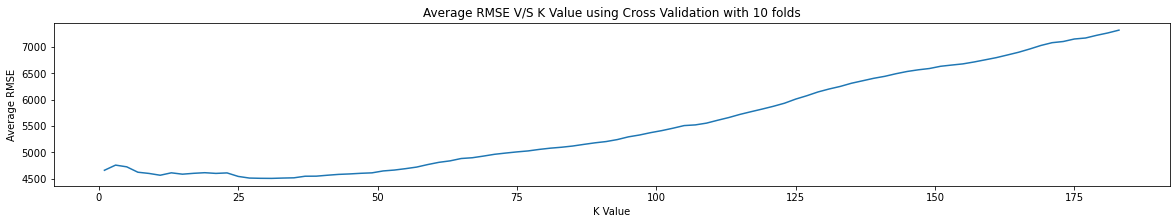

In [213]:
fig , ax = plt.subplots(1)

values=np.array([x for x in rmse_cvavg.values()])
keys=[k for k in rmse_cvavg.keys()]

ax.plot(tk, values)
ax.set_xlabel('K Value')
ax.set_ylabel('Average RMSE')
ax.set_title('Average RMSE V/S K Value using Cross Validation with 10 folds')

print(values.min(),keys[list(values).index(values.min())])
rmse_cvavg


## CONCLUSIONS

It is seen from above graph, best model is with parameter <B>K = 31 </B> with <B>Root Mean Square Error (RMSE) of 4505.803</B>
<BR><BR>

Also it can be seen that after <b>K = 31 </b> , model error  starts increasing, signifying <b> increase in variance </b> and that <b>model is Overfitting</b>


# L0 REGULARIZATION

### By researching and understanding material available through various websites and research papers, following points inferred about assignment task related to L0 Regularisation :

<ol>
    <li> L0 Regularisation means reducing model parameters to minimum</li>
    <li>L0 Regularization in our case means reducing no of features used without significant change in model accuracy</li>
</ol>


#### We will use hyperparameter value K = 31 as previously determined to give best model accuracy 

In [222]:
##Function to calculate K Nearest Neighbours

def KNN2 (train_data,price,test_data,k):
    pred=[] #label predicted by model
    
    for test in test_data:
        
        distances=[] ## Stores distance of test point from training points
        ##Calculates eucledian distance between test and train points
        trainid=[]
        for train in train_data:
            d = euc_dist(np.array(train),np.array(test))
            distances.append(d)

        
        distances=np.array(distances)
       
        ##Finds k nearest neighbors and thier values
        
        nearest=np.argsort(distances)[:k]
       
        near_values= [price[n] for n in nearest]
        
        ## Takes average of nearest neighbors values and appends to result
        pred.append(np.average(near_values))
    
    return pred



In [223]:
fea=use_feature.copy()
fea.remove('price')
rmse_f={}

for f1 in fea:
    pred = KNN2(train_set[f1],train_set['price'],val_set[f1],31)
    rmse_f[f1]=(rmse(val_set['price'],pred))


curb_weight  :  2542.625876115155
highway_mpg  :  2549.598156575432
city_mpg  :  2857.281488493693
width  :  3543.8990795332784
horsepower  :  3633.3330153126235
wheel_base  :  3767.7687667365026
length  :  3816.272270656666
aspiration  :  4075.9955480343865
fuel_type  :  4286.127624207339
compression_ratio  :  5142.820153857846
normalized_losses  :  5173.92263236713
bore  :  5595.822948149078
height  :  5663.343444357998
peak_rpm  :  6121.352365727603
stroke  :  6196.864109141743


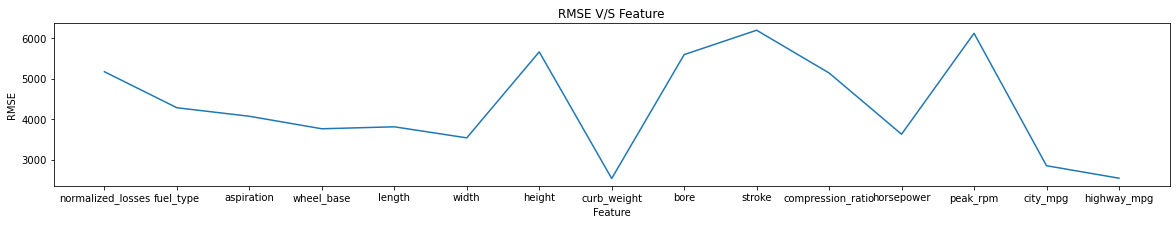

In [219]:
fig , ax = plt.subplots(1)

values=np.array([x for x in rmse_f.values()])
keys=[k for k in rmse_f.keys()]

ax.plot(keys, values)
ax.set_xlabel('Feature')
ax.set_ylabel('RMSE')
ax.set_title('RMSE V/S Feature')

rmse_f_sort = dict(sorted(rmse_f.items(), key=lambda x: x[1]))
for f2,v in rmse_f_sort.items():
    print(f2, ' : ',v)



## OBSERVATIONS
<ul>
<li>curb_weight and highway_mpg have least Root Mean Square Error associated with them, signifying that they may be optimal features to use in model</li>

<li>height , bore , peak_rpm and stroke have very high Root Mean Square Error associated with them, signifying that they may not be optimal features to use in model</li>
</ul>

#### We will now take top 4 features with lowest error and using different permutations ofthese features we will see if model accuracy can be improved

In [196]:
top_4=[x for x in list(rmse_f.keys())[0:5]]
perm=[[top_4[0],top_4[1]],[top_4[0],top_4[2]],[top_4[0],top_4[3]],[top_4[1],top_4[2]],[top_4[1],top_4[3]],[top_4[2],top_4[3]],[top_4[0],top_4[1],top_4[2]],[top_4[0],top_4[1],top_4[3]],[top_4[0],top_4[2],top_4[3]],[top_4[1],top_4[2],top_4[3]],top_4]

rmse_top = {}

for p in perm:
    pred = KNN(train_set[p],train_set['price'],val_set[p],31)
    rmse_top[perm.index(p)]=(rmse(val_set['price'],pred))

rmse_top

{0: 2457.3572319849563,
 1: 1947.2193894580923,
 2: 2269.2101407268215,
 3: 2600.5401908207496,
 4: 2310.963956020792,
 5: 1859.0540843159429,
 6: 2120.4045772029926,
 7: 2211.5845969757956,
 8: 1822.874268604046,
 9: 2096.3257709869436,
 10: 1904.021757525885}

1822.874268604046 curb_weight city_mpg width 


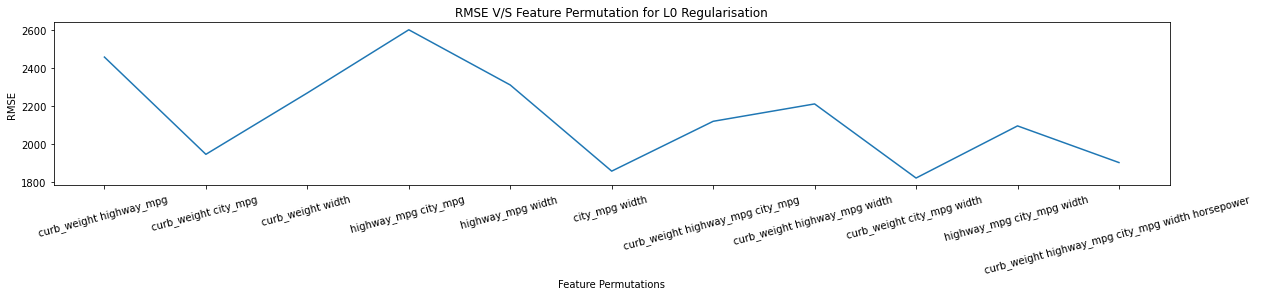

In [214]:

fig , ax = plt.subplots(1)

values=np.array([x for x in rmse_top.values()])
keys=[]

for i in perm:
    s=''
    for j in i:
        s=s+j+" "
    keys.append(s)


ax.plot(keys, values)
ax.set_xlabel('Feature Permutations')
ax.set_ylabel('RMSE')
ax.set_title('RMSE V/S Feature Permutation for L0 Regularisation')
ax.tick_params(axis= 'x' , rotation=15, labelsize=10)

print(values.min(),keys[list(values).index(values.min())])



## CONCLUSIONS

It is seen from above graph, best model is with <B>curb_weight , city_mpg and width </B> used as features for prediction with <B>Root Mean Square Error (RMSE) of 1822.874</B>
<BR>

It can be seen that it reduces model RMSE by  <b>9.28% </b> over model using 15 features for predicting 'Price' with RMSE of 2009.423
<BR>

Also if further no of features used for prediction have to be reduced and slight increase in RMSE of model is acceptable then :

<ul>
        <li>city_mpg and width can be used with RMSE of 1859.054</li>
        <li>curb_weight and city_mpg can be used with RMSE of 1947.219</li>
</ul>
<BR>
    
### Also L0 Regularisation has improved Generalisation by <b>improving model accuracy</b>

## INFERENCES

#### Most important features identified for prediction by KNN in decreasing order are :
<ol>
    <li>curb_weight</li>
    <li>highway_mpg</li>
    <li>city_mpg</li>
    <li>width</li>
</ol>

#### According to my knowledge of real word price factors city_mpg and width should be more important features than curb_weight.
#### fuel_type and horsepower also should have been more important feature than curb_weight